In [1]:
import pandas as pd
papers = pd.read_csv('/content/big_sentiments.csv')
papers.head()

,Text_Id,Text,Date,Location,Sentiments
0,1241032866567356417,RT @theskindoctor13: Shaheen Bagh is still on....,Fri Mar 20 16:04:27 +0000 2020,"Uttar Pradesh, India",0.000
1,1241032867699765249,RT @theskindoctor13: Shaheen Bagh is still on....,Fri Mar 20 16:04:27 +0000 2020,Mumbai,0.000
2,1241032875102703616,"RT @SmokingSkills_: Daughter of an IAS, son of...",Fri Mar 20 16:04:29 +0000 2020,"Jodhpur, India",0.350
3,1241032877099237379,RT @narendramodi: The young actors have someth...,Fri Mar 20 16:04:29 +0000 2020,"Gurugram, Bharat",0.125
4,1241032870405128192,RT @theskindoctor13: Shaheen Bagh is still on....,Fri Mar 20 16:04:28 +0000 2020,"New Delhi, India",0.000


In [2]:
#Removing meta columns
papers = papers.drop(columns = ['Text_Id', 'Date', 'Date', 'Location', 'Sentiments'], axis=1)
#Print out the first rows of papers
papers['Text']

0         RT @theskindoctor13: Shaheen Bagh is still on....
1         RT @theskindoctor13: Shaheen Bagh is still on....
2         RT @SmokingSkills_: Daughter of an IAS, son of...
3         RT @narendramodi: The young actors have someth...
4         RT @theskindoctor13: Shaheen Bagh is still on....
                                ...                        
648953    For the first time perhaps, someone to took ti...
648954    RT @hvgoenka: 70 year Kamalamma offered an NGO...
648955    Odisha reports 129 new #COVID19 positive cases...
648956    @nidhiindiatv Happy rainy day ..\n\nHope rain ...
648957    RT @nsui: Kerala Student Union activists did S...
Name: Text, Length: 648958, dtype: object

In [3]:
import re
def deEmojify(text):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'',text)
def deURLify(text):
    text=re.sub(r'http\S+', '', text)
    return text
def deEscapeStatements(text):
    text = text.replace('\n', ' ').replace('\r', '')
    return text
def asciiencoding(text):
    encoded_string = text.encode("ascii", "ignore")
    decode_string = encoded_string.decode()
    return decode_string
#Removing all escape sequences, all emojis, all URLs and all non-ascii text from tweets:
#for i in range(len(papers['Text'])):
#    papers['Text'][i] = deEmojify(deURLify(deEscapeStatements(asciiencoding(papers['Text'][i]))))
#papers['Text']

0         RT @theskindoctor13: Shaheen Bagh is still on....
1         RT @theskindoctor13: Shaheen Bagh is still on....
2         RT @SmokingSkills_: Daughter of an IAS, son of...
3         RT @narendramodi: The young actors have someth...
4         RT @theskindoctor13: Shaheen Bagh is still on....
                                ...                        
648953    For the first time perhaps, someone to took ti...
648954    RT @hvgoenka: 70 year Kamalamma offered an NGO...
648955    Odisha reports 129 new #COVID19 positive cases...
648956    @nidhiindiatv Happy rainy day ..  Hope rain wi...
648957    RT @nsui: Kerala Student Union activists did S...
Name: Text, Length: 648958, dtype: object

In [4]:

import re
#Remove punctuation
papers['Text'] = papers['Text'].map(lambda x: re.sub('[,/.!?@&#:]', '', x))

#Convert the titles to lowercase
papers['Text'] = papers['Text'].map(lambda x: x.lower())

#print out the first rows of papers
papers['Text'].head(20)

0     rt theskindoctor13 shaheen bagh is still on  m...
1     rt theskindoctor13 shaheen bagh is still on  m...
2     rt smokingskills_ daughter of an ias son of a ...
3     rt narendramodi the young actors have somethin...
4     rt theskindoctor13 shaheen bagh is still on  m...
5     rt narendramodi explosive batsmen who've seen ...
6     rt gkd600 no more spreading rumors this is the...
7     rt bainjal that son of a top official in west ...
8     rt amitandon corona has proven that india's  b...
9     rt dt_ritika being a cancer patient i am scare...
10    ghmconline cphydcity ministerktr eatala_rajend...
11    rt amitandon corona has proven that india's  b...
12    rt alok_bhatt one person sent to quarantine tr...
13    rt amitandon corona has proven that india's  b...
14    rt theoceanvibes all those corona jokes are ok...
15    "delhi government will pay salaries to all con...
16    rt amitandon corona has proven that india's  b...
17    rt amitandon corona has proven that india'

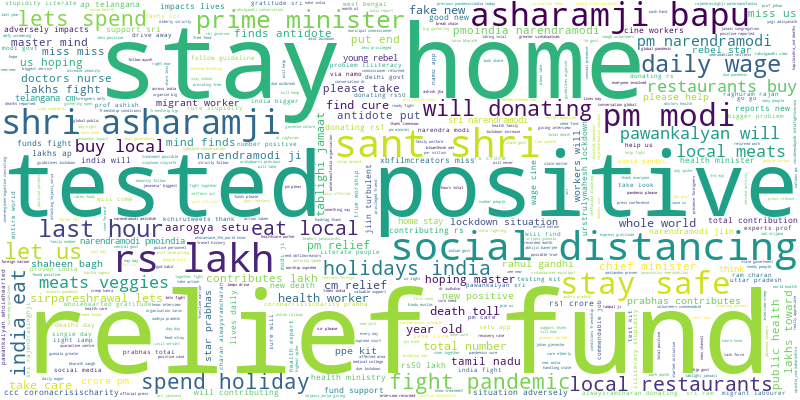

In [5]:
from wordcloud import WordCloud, STOPWORDS

#Join the different processed titles together
long_string = ','.join(list(papers['Text'].values))
stopwords = set(STOPWORDS)
stopwords.add("https")
stopwords.add("covid19")
stopwords.add("corona")
stopwords.add("coronavirus")
stopwords.add("virus")
stopwords.add("cases")
stopwords.add("covid")
stopwords.add("ha")
stopwords.add("wa")
stopwords.add("amp")
stopwords.add("&")
stopwords.add("rt")
stopwords.add("viru")
stopwords.add("coronaviru")
stopwords.add("thi")

#Narendra Modi is the Prime minister of India
#stopwords.add("lakh")
#Create a WordCloud object
wc = WordCloud(background_color = "white", width=800, height=400, stopwords=stopwords, max_words = 1000, contour_width = 3, contour_color='steelblue')

#Generate a word cloud
wc.generate(long_string)

#Visualize the word cloud
wc.to_image()

In [6]:
#check papers HERE
'''


STOP

STOP


'''
papers['Text'].head()

0    rt theskindoctor13 shaheen bagh is still on  m...
1    rt theskindoctor13 shaheen bagh is still on  m...
2    rt smokingskills_ daughter of an ias son of a ...
3    rt narendramodi the young actors have somethin...
4    rt theskindoctor13 shaheen bagh is still on  m...
Name: Text, dtype: object

In [7]:
'''for i in range(len(papers['Text'])):
    a = papers['Text'][i].split('  ')
    a = list(map(lambda x: re.sub(' ', '', x), a))
    a[:] = [x for x in a if x!='']
    a_s = ' '.join(a)
    papers['Text'][i] = a_s'''
papers['Text']

0         rt theskindoctor13 shaheen bagh is still on  m...
1         rt theskindoctor13 shaheen bagh is still on  m...
2         rt smokingskills_ daughter of an ias son of a ...
3         rt narendramodi the young actors have somethin...
4         rt theskindoctor13 shaheen bagh is still on  m...
                                ...                        
648953    for the first time perhaps someone to took tim...
648954    rt hvgoenka 70 year kamalamma offered an ngo i...
648955    odisha reports 129 new covid19 positive cases;...
648956    nidhiindiatv happy rainy day   hope rain will ...
648957    rt nsui kerala student union activists did san...
Name: Text, Length: 648958, dtype: object

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


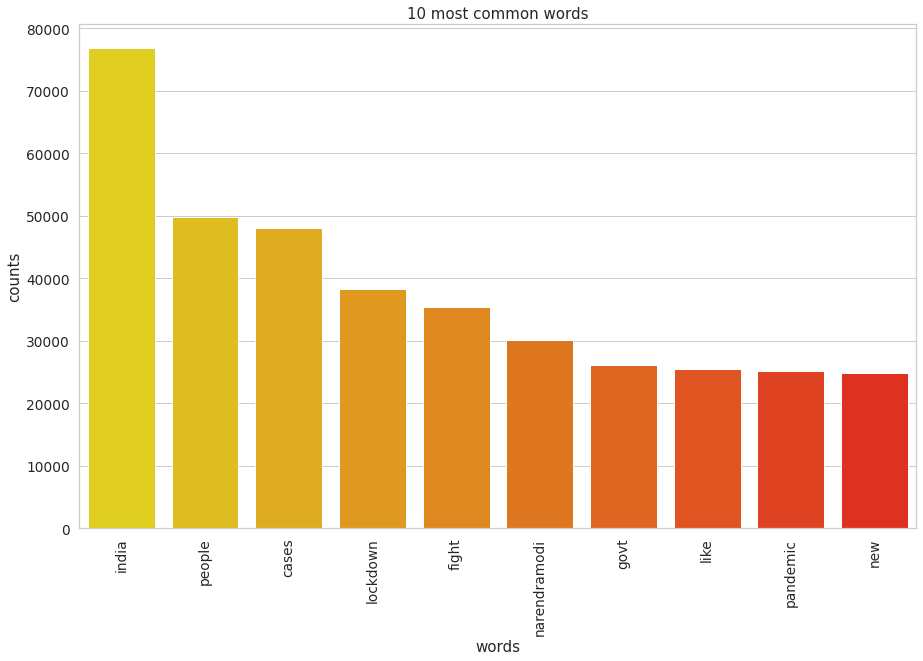

In [13]:
#Load the library with the CountVectorizer method
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

for i in range(len(papers['Text'])):
    temp_list = papers['Text'][i]
    #temp_list = papers['Text'][i].split()
    #temp_list = re.sub(' &amp ', ' ', temp_list)
    #temp_list = re.sub('amp ', ' ', temp_list)
    temp_list = re.sub(' amp ', ' ', temp_list)
    temp_list = re.sub('amp ', ' ', temp_list)
    temp_list = re.sub(' amp', ' ' , temp_list)
    temp_list = re.sub('covid ', ' ', temp_list)
    temp_list = re.sub(' covid', ' ', temp_list)
    temp_list = re.sub('corona ', ' ', temp_list)
    temp_list = re.sub(' corona', ' ', temp_list)
    #temp_list = re.sub(' covid19 ', ' ', temp_list)
    #temp_list = re.sub(' coronavirus ', ' ', temp_list)
    #temp_list = re.sub(' covid ', ' ', temp_list)
    #temp_list = re.sub(' corona ', ' ', temp_list)
    #temp_list = re.sub(' virus ', ' ', temp_list)
    temp_list = re.sub('rt ', ' ', temp_list)
    #temp_list = re.sub(' thi ', ' ', temp_list)
    #temp_list = re.sub(' wa ', ' ', temp_list)
    #temp_list = re.sub(' & ', ' ', temp_list)
    #temp_list = re.sub(' viru ', ' ', temp_list)
    #temp_list = re.sub(' coronaviru ', ' ', temp_list)
    temp_list = re.sub('19 ', ' ', temp_list)
    temp_list = re.sub(' 19', ' ', temp_list)
    #temp_list = re.sub('"', '', temp_list)
    #temp_list = re.sub("'", '', temp_list)
    #papers['Text'][i] = re.sub('demonetization', '', papers['text'][i])
    #print("LEN: ", len(temp_list)) ##
    #for element in temp_list:
        #if ('0' in element) or ('1' in element) or ('2' in element) or ('3' in element) or ('4' in element) or ('5' in element) or ('6' in element) or ('7' in element) or ('8' in element) or ('9' in element):
            #del temp_list[temp_list.index(element)]
    papers['Text'][i] = temp_list #rejoining


#helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse = True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words))
    
    plt.figure(2, figsize = (15, 15/1.6180))
    plt.subplot(title='10 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='autumn_r')
    plt.xticks(x_pos, words, rotation=90)
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()
    
#Initialize the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words = 'english')

#Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(papers['Text'])

#Visualize the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)

In [10]:
re.sub('rt ', ' ', papers['Text'][0])


' theskindoctor13 shaheen bagh is still on  mosques are open  muiiahs are saying wont harm if you read qalma  tiktokiye are m'

In [12]:
'rt ' in papers['Text'][0]

True

In [14]:
#Now we tweak a number of topic parameters
import warnings
warnings.simplefilter("ignore", DeprecationWarning)

#Load the LDA model from sklearn
from sklearn.decomposition import LatentDirichletAllocation as LDA

#Helper function
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #{}:".format(topic_idx))
        print(" ".join([words[i] for i in topic.argsort()[:-n_top_words -1:-1]]))

#Tweak the two parameters below (use int values below 15)
number_topics = 5
number_words = 10

#Create and fit the LDA model
lda = LDA(n_components=number_topics)
lda.fit(count_data)

#Print the topics found by the LDA model
print("Topics found via LDA: ")
print_topics(lda, count_vectorizer, number_words)

Topics found via LDA: 

Topic #0:
india local lets pm narendramodi lockdown app month buy time

Topic #1:
fight narendramodi world india people like home pm stay doing

Topic #2:
cases india new positive deaths total people delhi number tested

Topic #3:
lockdown people pandemic shri follow india fight rs food time

Topic #4:
lockdown govt india sir pmoindia just like people health pandemic


In [16]:
!pip install pyLDAvis

     |████████████████████████████████| 1.6MB 4.4MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97712 sha256=6735feb00d78a74e76eaf5fa990658dcced0e9865db65782b17893ce7afd4e2a
  Stored in directory: /root/.cache/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
Successfully built pyLDAvis


In [18]:
%%time

from pyLDAvis import sklearn as sklearn_lda
import pickle 
import pyLDAvis
import os

# Visualize the topics
pyLDAvis.enable_notebook()

LDAvis_data_filepath = os.path.join(r'/content/ldavisprepared_bigsentiments_'+str(number_topics))
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:

    LDAvis_prepared = sklearn_lda.prepare(lda, count_data, count_vectorizer)

    #with open(LDAvis_data_filepath, 'wb') as f:
        #pickle.dump(LDAvis_prepared, f)
        
# load the pre-prepared pyLDAvis data from disk
#with open(LDAvis_data_filepath) as f:
    #LDAvis_prepared = pickle.load(f, encoding='utf-8')

pyLDAvis.save_html(LDAvis_prepared, r'/content/ldavisprepared_bigsentiments_5.html')

LDAvis_prepared

CPU times: user 2min 2s, sys: 319 ms, total: 2min 2s
Wall time: 2min 15s


In [1]:
#small sentiments
import pandas as pd
papers = pd.read_csv('/content/small_sentiments.csv')
papers.head()

,Unnamed: 0,sentiment,text
0,3204,sad,agree the poor in india are treated badly thei...
1,1431,joy,if only i could have spent the with this cutie...
2,654,joy,will nature conservation remain a priority in ...
3,2530,sad,coronavirus disappearing in italy show this to...
4,2296,sad,uk records lowest daily virus death toll since...


In [2]:
#Removing meta columns
papers = papers.drop(columns = ['Unnamed: 0', 'sentiment'], axis=1)
#Print out the first rows of papers
papers['text']

0       agree the poor in india are treated badly thei...
1       if only i could have spent the with this cutie...
2       will nature conservation remain a priority in ...
3       coronavirus disappearing in italy show this to...
4       uk records lowest daily virus death toll since...
                              ...                        
3085    today at 02 30pm a 54 year old bangladeshi mal...
3086    corona virus i implore that you cease activity...
3087    issa date once lockdown ends inshaallah (and c...
3088    the death toll due to covid 19 rose to 31 in j...
3089    the rates are become barrier for poor people t...
Name: text, Length: 3090, dtype: object

In [4]:
import re
def deEmojify(text):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'',text)
def deURLify(text):
    text=re.sub(r'http\S+', '', text)
    return text
def deEscapeStatements(text):
    text = text.replace('\n', ' ').replace('\r', '')
    return text
def asciiencoding(text):
    encoded_string = text.encode("ascii", "ignore")
    decode_string = encoded_string.decode()
    return decode_string

for i in range(len(papers['text'])):
    papers['text'][i] = deEmojify(deURLify(deEscapeStatements(asciiencoding(papers['text'][i]))))
papers['text']

0       agree the poor in india are treated badly thei...
1       if only i could have spent the with this cutie...
2       will nature conservation remain a priority in ...
3       coronavirus disappearing in italy show this to...
4       uk records lowest daily virus death toll since...
                              ...                        
3085    today at 02 30pm a 54 year old bangladeshi mal...
3086    corona virus i implore that you cease activity...
3087    issa date once lockdown ends inshaallah (and c...
3088    the death toll due to covid 19 rose to 31 in j...
3089    the rates are become barrier for poor people t...
Name: text, Length: 3090, dtype: object

In [6]:

import re
#Remove punctuation
papers['text'] = papers['text'].map(lambda x: re.sub('[,/.!?@&#:]', '', x))

#Convert the titles to lowercase
papers['text'] = papers['text'].map(lambda x: x.lower())

#print out the first rows of papers
papers['text'].head(20)

0     agree the poor in india are treated badly thei...
1     if only i could have spent the with this cutie...
2     will nature conservation remain a priority in ...
3     coronavirus disappearing in italy show this to...
4     uk records lowest daily virus death toll since...
5     joe biden's coronavirus web address lands on a...
6     respected sir in our telangana all private tea...
7     so is also 20 times more lethal than influenza...
8     thull is passing the most dangerous and ultra ...
9     thull is passing the most dangerous and ultra ...
10    coronavirus has a 3 4% mortality rate the flu ...
11    | is officially free city and the celebration ...
12    what worries me most these days me and a lot o...
13     i do not understand the point of demanding en...
14    you all know one thing the muslims will not fi...
15    covid 19 cyclones earthquakes riots still we h...
16    i will fill my heart to your soul during covid...
17    maybe if i bolt my front door shut coronav

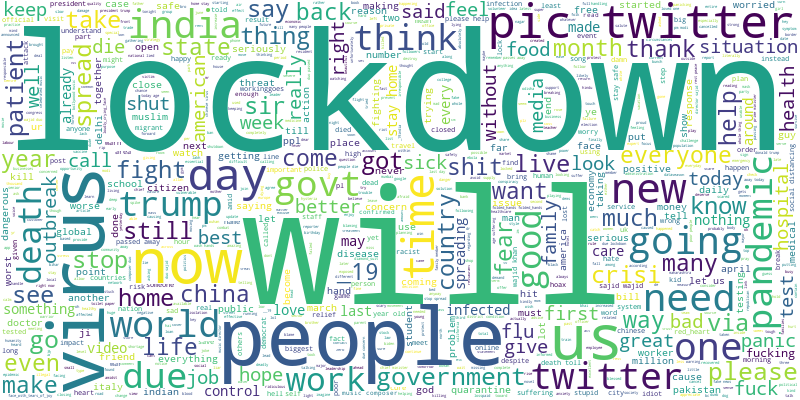

In [11]:
from wordcloud import WordCloud, STOPWORDS

#Join the different processed titles together
long_string = ','.join(list(papers['text'].values))
stopwords = set(STOPWORDS)
stopwords.add("https")
stopwords.add("covid19")
stopwords.add("corona")
stopwords.add("coronavirus")
#stopwords.add("virus")
stopwords.add("cases")
stopwords.add("covid")
#stopwords.add("ha")
stopwords.add("wa")
stopwords.add("amp")
stopwords.add("&")
stopwords.add("rt")
#stopwords.add("viru")
#stopwords.add("coronaviru")
#stopwords.add("thi")

#Narendra Modi is the Prime minister of India
#stopwords.add("lakh")
#Create a WordCloud object
wc = WordCloud(background_color = "white", width=800, height=400, stopwords=stopwords, max_words = 1000, contour_width = 3, contour_color='steelblue')

#Generate a word cloud
wc.generate(long_string)

#Visualize the word cloud
wc.to_image()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


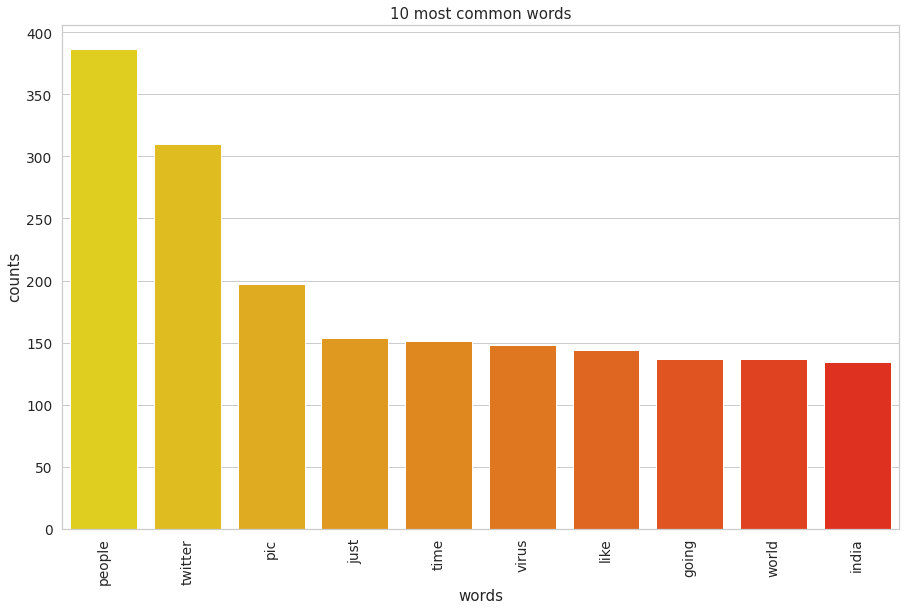

In [16]:
#Load the library with the CountVectorizer method
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

for i in range(len(papers['text'])):
    temp_list = papers['text'][i]
    #temp_list = papers['Text'][i].split()
    #temp_list = re.sub(' &amp ', ' ', temp_list)
    #temp_list = re.sub('amp ', ' ', temp_list)
    temp_list = re.sub(' amp ', ' ', temp_list)
    temp_list = re.sub('amp ', ' ', temp_list)
    temp_list = re.sub(' amp', ' ' , temp_list)
    temp_list = re.sub('covid ', ' ', temp_list)
    temp_list = re.sub(' covid', ' ', temp_list)
    temp_list = re.sub('corona ', ' ', temp_list)
    temp_list = re.sub(' corona', ' ', temp_list)
    temp_list = re.sub(' covid19 ', ' ', temp_list)
    temp_list = re.sub('covid19 ', ' ', temp_list)
    temp_list = re.sub('lockdown ', ' ', temp_list)
    temp_list = re.sub(' lockdown ', ' ', temp_list)
    temp_list = re.sub(' coronavirus ', ' ', temp_list)
    temp_list = re.sub(' covid ', ' ', temp_list)
    temp_list = re.sub('covid ', ' ', temp_list)
    temp_list = re.sub(' corona ', ' ', temp_list)
    temp_list = re.sub('corona ', ' ', temp_list)
    temp_list = re.sub(' virus ', ' ', temp_list)
    temp_list = re.sub('virus ', ' ', temp_list)
    temp_list = re.sub('rt ', ' ', temp_list)
    #temp_list = re.sub(' thi ', ' ', temp_list)
    #temp_list = re.sub(' wa ', ' ', temp_list)
    temp_list = re.sub(' & ', ' ', temp_list)
    #temp_list = re.sub(' viru ', ' ', temp_list)
    #temp_list = re.sub(' coronaviru ', ' ', temp_list)
    temp_list = re.sub('19 ', ' ', temp_list)
    temp_list = re.sub(' 19', ' ', temp_list)
    #temp_list = re.sub('"', '', temp_list)
    #temp_list = re.sub("'", '', temp_list)
    #papers['Text'][i] = re.sub('demonetization', '', papers['text'][i])
    #print("LEN: ", len(temp_list)) ##
    #for element in temp_list:
        #if ('0' in element) or ('1' in element) or ('2' in element) or ('3' in element) or ('4' in element) or ('5' in element) or ('6' in element) or ('7' in element) or ('8' in element) or ('9' in element):
            #del temp_list[temp_list.index(element)]
    papers['text'][i] = temp_list #rejoining


#helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse = True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words))
    
    plt.figure(2, figsize = (15, 15/1.6180))
    plt.subplot(title='10 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='autumn_r')
    plt.xticks(x_pos, words, rotation=90)
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()
    
#Initialize the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words = 'english')

#Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(papers['text'])

#Visualize the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)

In [17]:
#Now we tweak a number of topic parameters
import warnings
warnings.simplefilter("ignore", DeprecationWarning)

#Load the LDA model from sklearn
from sklearn.decomposition import LatentDirichletAllocation as LDA

#Helper function
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #{}:".format(topic_idx))
        print(" ".join([words[i] for i in topic.argsort()[:-n_top_words -1:-1]]))

#Tweak the two parameters below (use int values below 15)
number_topics = 5
number_words = 10

#Create and fit the LDA model
lda = LDA(n_components=number_topics)
lda.fit(count_data)

#Print the topics found by the LDA model
print("Topics found via LDA: ")
print_topics(lda, count_vectorizer, number_words)

Topics found via LDA: 

Topic #0:
twitter pic wajid away music suffering khan world sajid people

Topic #1:
people twitter pic good time day sir trump virus bad

Topic #2:
people just cases government virus going like need help days

Topic #3:
people twitter india shit world cases pic like virus death

Topic #4:
people home trump govt stay india going time work safe


In [19]:
!pip install pyLDAvis

     |████████████████████████████████| 1.6MB 13.8MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97712 sha256=f619b12c9cc8245989b9a030a34ad5cf32bbca94f562782fd04acde18d82f57b
  Stored in directory: /root/.cache/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
Successfully built pyLDAvis


In [20]:
%%time

from pyLDAvis import sklearn as sklearn_lda
import pickle 
import pyLDAvis
import os

# Visualize the topics
pyLDAvis.enable_notebook()

LDAvis_data_filepath = os.path.join(r'/content/ldavisprepared_smallsentiments_'+str(number_topics))
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:

    LDAvis_prepared = sklearn_lda.prepare(lda, count_data, count_vectorizer)

    #with open(LDAvis_data_filepath, 'wb') as f:
        #pickle.dump(LDAvis_prepared, f)
        
# load the pre-prepared pyLDAvis data from disk
#with open(LDAvis_data_filepath) as f:
    #LDAvis_prepared = pickle.load(f, encoding='utf-8')

pyLDAvis.save_html(LDAvis_prepared, r'/content/ldavisprepared_smallsentiments_5.html')

LDAvis_prepared

CPU times: user 1.17 s, sys: 64.2 ms, total: 1.23 s
Wall time: 3.28 s
